## Demonstration of GraphBG-MS on the mouse liver Seq-Scope data

## Analysis follows the scNiche framework, but with GraphBG-MS labels.

### Import modules

In [1]:
import scniche as sn
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scniche.pl import *
import warnings
warnings.filterwarnings('ignore')

print("Last run with scNiche version:", sn.__version__)

# set seed
sn.pp.set_seed()

Last run with scNiche version: 1.1.1


### Load data

We can download the dataset from figshare, and load it by the `read_h5ad()` function of `scanpy`, or directly download and load the dataset by the `mouse_liver_seq_scope()` of `scniche`

In [2]:
adata = sc.read_h5ad('/data/hoan/spatial_transcriptomics/data/scNiche/liver_GraphBG.h5ad')

In [3]:
# normalize first
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata

AnnData object with n_obs × n_vars = 37505 × 20423
    obs: 'tile', 'x', 'y', 'condition', 'celltype', 'cell', 'scNiche', 'group', 'batch', 'Region', 'GraphBG-MS_labels'
    uns: 'log1p'
    obsm: 'X_cn', 'X_cn_norm', 'X_data', 'X_data_nbr', 'X_scVI', 'X_scniche', 'spatial'

In [4]:
print('Use graphGB label for the analysis')
adata.obs['scNiche'] = adata.obs['GraphBG-MS_labels'].copy()

Use graphGB label for the analysis


In [5]:
# Replace "Niche" with "Domain" in the column
adata.obs['scNiche'] = adata.obs['scNiche'].str.replace("Niche", "Domain ")
adata.obs['scNiche'] = adata.obs['scNiche'].astype('category')
# Extract current categories
cats = adata.obs['scNiche'].cat.categories
# Sort them numerically
sorted_cats = sorted(cats, key=lambda x: int(x.split(" ")[1]))
# Reassign categories with the new order
adata.obs['scNiche'] = adata.obs['scNiche'].cat.reorder_categories(sorted_cats, ordered=True)

### Some visualizations

Visualizing the cellular composition of each cell niche by the `stacked_barplot()` function of `scniche`

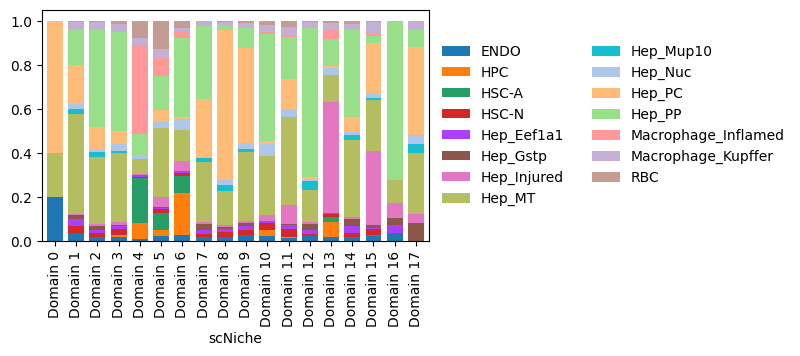

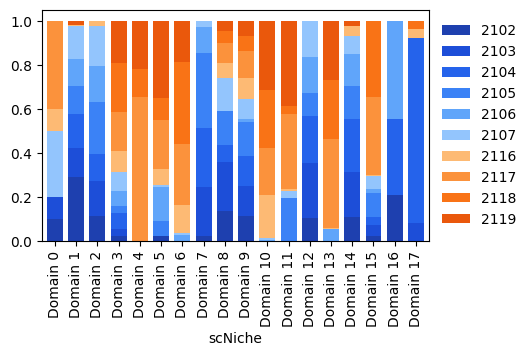

In [6]:
kwargs = {'figsize': (5, 3)}
sn.pl.stacked_barplot(adata, x_axis='scNiche', y_axis='celltype', mode='proportion', palette=palettes.default_20, kwargs=kwargs)
palette_use = ["#1e40af", "#1d4ed8", "#2563eb", "#3b82f6", "#60a5fa", "#93c5fd", "#fdba74", "#fb923c", "#f97316", "#ea580c"]
sn.pl.stacked_barplot(adata, x_axis='scNiche', y_axis='tile', mode='proportion', palette=palette_use, kwargs=kwargs)

Visualizing the spatial distribution of cell populations or cell niches for each slice

<AxesSubplot: title={'center': 'scNiche'}, xlabel='spatial1', ylabel='spatial2'>

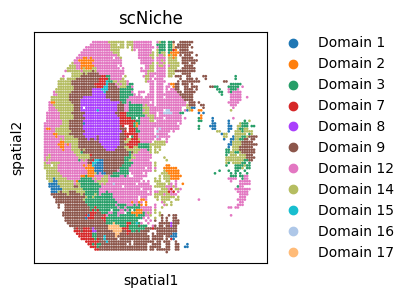

In [7]:
plt.rcParams["figure.figsize"] = (3, 3)
# niches
palette_use = [palettes.default_57[0], palettes.default_57[1], '#dcdddd', palettes.default_57[3], palettes.default_57[5], '#dcdddd', 
               '#dcdddd', '#dcdddd', '#dcdddd', palettes.default_57[11], palettes.default_57[12], '#dcdddd', palettes.default_57[14], ]
palette_use = palettes.default_20
sc.pl.embedding(adata[(adata.obs['tile'] == 2104)], basis="spatial", color=['scNiche', ],s=15, show=False, palette=palette_use)

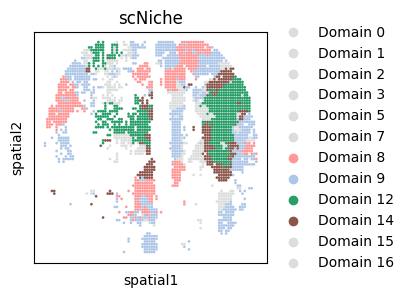

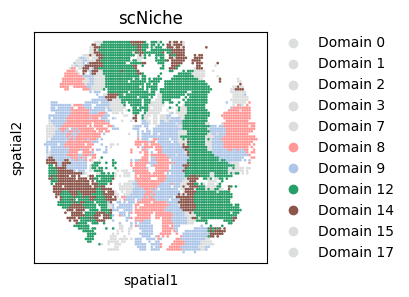

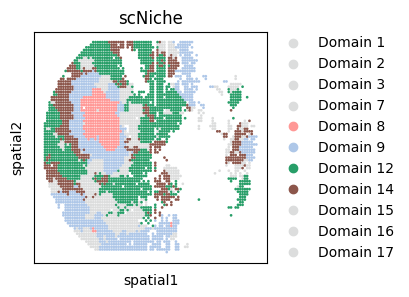

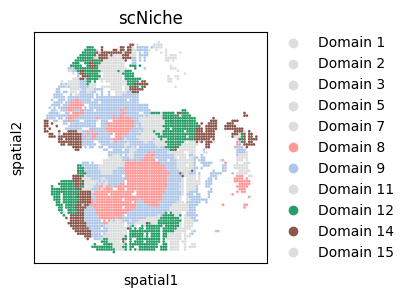

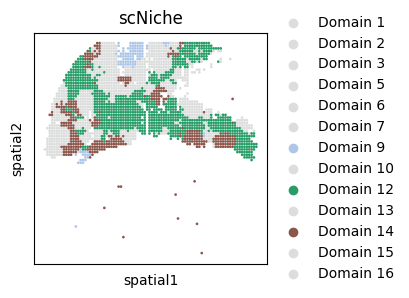

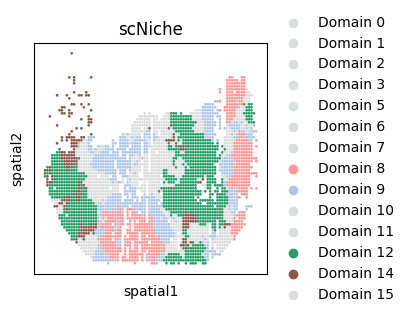

In [24]:
color_dict = {'Domain 0': '#1f77b4', 'Domain 1': '#b5bd61', 'Domain 2': '#d62728', 'Domain 3': '#ffbb78', 'Domain 4': '#e377c2', 
              'Domain 5': '#98df8a', 'Domain 6': '#ff7f0e', 'Domain 7': '#dbdb8d', 'Domain 8': '#ff9896', 'Domain 9': '#aec7e8', 
              'Domain 10': '#8c6d31', 'Domain 11': '#ad494a', 'Domain 12': '#279e68',
              'Domain 13': '#f7b6d2', 'Domain 14': '#8c564b', 'Domain 15': '#9edae5', 'Domain 16': '#aa40fc', 'Domain 17': '#c49c94'}
import random
palette_use = palettes.default_20.copy()  # copy, don't mutate the original

for key in color_dict:
    if key not in ['Domain 8', 'Domain 9', 'Domain 12', 'Domain 14', ]:
        color_dict[key] = '#dcdddd'
sc.pl.embedding( adata[adata.obs['tile'] == 2102], basis="spatial", color=['scNiche'], s=15, show=False, palette=color_dict)
sc.pl.embedding( adata[adata.obs['tile'] == 2103], basis="spatial", color=['scNiche'], s=15, show=False, palette=color_dict)
sc.pl.embedding( adata[adata.obs['tile'] == 2104], basis="spatial", color=['scNiche'], s=15, show=False, palette=color_dict)
sc.pl.embedding( adata[adata.obs['tile'] == 2105], basis="spatial", color=['scNiche'], s=15, show=False, palette=color_dict)
sc.pl.embedding( adata[adata.obs['tile'] == 2106], basis="spatial", color=['scNiche'], s=15, show=False, palette=color_dict)
sc.pl.embedding( adata[adata.obs['tile'] == 2107], basis="spatial", color=['scNiche'], s=15, show=False, palette=color_dict)

plt.show()

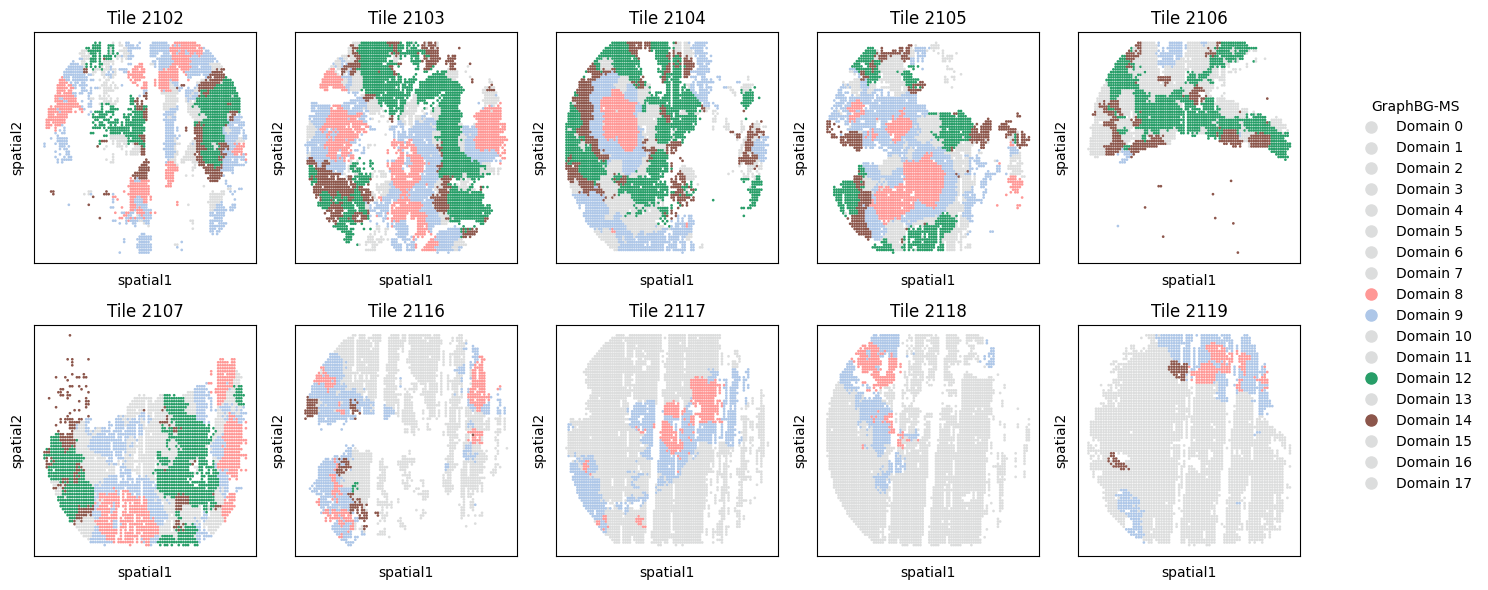

In [25]:
import matplotlib.lines as mlines

tiles = [2102, 2103, 2104, 2105, 2106, 2107, 2116, 2117, 2118, 2119]

# prepare figure with grid
ncols = 5
nrows = (len(tiles) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols, 3*nrows))
axes = axes.flatten()

for i, tile in enumerate(tiles):
    ax = axes[i]
    sc.pl.embedding(
        adata[adata.obs['tile'] == tile],
        basis="spatial",
        color=['scNiche'],
        s=15,
        show=False,
        palette=color_dict,
        ax=ax,
        legend_loc=None   # suppress per-subplot legends
    )
    ax.set_title(f"Tile {tile}")

# remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# 🔑 build shared circle legend
categories = adata.obs['scNiche'].cat.categories
handles = [
    mlines.Line2D([], [], color=color_dict[cat], marker='o', linestyle='None',
                  markersize=8, label=cat) for cat in categories if cat in color_dict
]

# put legend to the right, outside plots
fig.legend(handles, categories, loc="center left", bbox_to_anchor=(0.9, 0.5),
           title="GraphBG-MS", frameon=False)

plt.tight_layout(rect=[0, 0, 0.88, 1])  # leave space on the right for legend
fig.savefig("output/GraphBG_tiles_v2.pdf", bbox_inches="tight")
plt.show()

### Enrichment analysis framework: Does a certain cell type (cluster) appear more often in one group compared to others? This is what enrichment analysis means here.

`scniche` implements a general enrichment analysis framework that can characterize the identified cell niches from various perspectives (including cellular compositions, conditions, and samples, etc.) and compute the corresponding enrichment scores.
We can perform the enrichment analysis from different perspectives by setting the values of the `id_key` and `val_key` parameters. The result is stored in `adata.uns[f"{val_key}_{id_key}_fc"]` and `adata.uns[f"{val_key}_{id_key}_pval"]`.

It is worth noting that the p-value is calculated by the one-sided Mann-Whitney U test.
If the sample size in the dataset is too small (`library_key`),a valid test cannot be implemented.
In this case, we can consider only the enrichment scores and set the parameter `show_pval` to False in the `enrichment_heatmap` function of `scniche` during visualization.

In [12]:
row_order = list(np.unique(adata.obs['scNiche']))

Calculating the enrichment of each cluster (scNiche) in group (group)...


Cluster: Domain 9: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 118.91it/s]


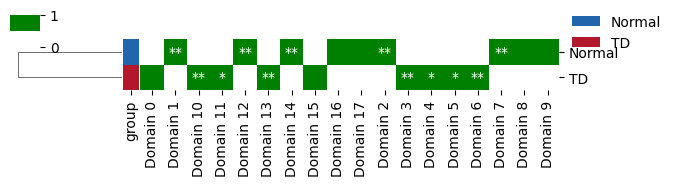

In [13]:
# condition enrichment
sn.al.enrichment(adata, id_key='scNiche', val_key='group', library_key='tile')
# plot
kwargs = {'figsize': (6, 1.8), 'vmax': 1, 'linewidths': 0, 'linecolor': 'white', }
palette_use = ['#2166AC', '#B2182B', ]
# col_order = [ 'Niche0', 'Niche3', 'Niche12', 'Niche5', 'Niche14', 'Niche11', 'Niche1', 'Niche10',  'Niche2', 'Niche6', 'Niche8', 'Niche13', 'Niche7', 'Niche9', 'Niche4', ]
col_order = list(np.unique(adata.obs['scNiche']))
sn.pl.enrichment_heatmap(adata=adata, id_key='scNiche', val_key='group', anno_palette=palette_use, binarized=True, col_order=col_order, show_pval=True,
                         anno_key='group', kwargs=kwargs)

In [14]:
# condition enrichment
sn.al.enrichment(adata, id_key='scNiche', val_key='group', library_key='tile')

# plotting options
kwargs = {'figsize': (6, 1.8), 'vmax': 1, 'linewidths': 0, 'linecolor': 'white'}
palette_use = ['#2166AC', '#B2182B']
col_order = list(np.unique(adata.obs['scNiche']))

# create plot
fig = enrichment_heatmap(adata=adata, id_key='scNiche', val_key='group', anno_palette=palette_use, binarized=True, col_order=col_order, show_pval=True,
                         anno_key='group', kwargs=kwargs)
# save to PDF
import matplotlib.pyplot as plt
plt.savefig("output/condition_enrichment.pdf", bbox_inches="tight")
plt.close()

Calculating the enrichment of each cluster (scNiche) in group (group)...


Cluster: Domain 9: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 119.58it/s]


### Differential expression gene analysis

We can calculate the differential expression genes within cell niches by the `rank_genes_groups` function of `scanpy`.
Subsequently, the average expression values of this differential expression genes in each niche can be calculated using the `average_exp` function of `scniche`.

In this example, we found that the 4 cell niches (Niche 8, 9, 14, 12) enriched in normal livers exhibited spatial continuity,
encompassing the zonation patterns from the central vein to the portal node, and differentially expressed genes (adjusted p-value < 0.05) within these 7 niches also showed a pronounced spatial expression pattern of zones.

In [15]:
select_niche =  ['Domain 8', 'Domain 9','Domain 14', 'Domain 12'] 
adata2 = adata[adata.obs['scNiche'].isin(select_niche)].copy()
sc.tl.rank_genes_groups(adata2, "scNiche", method="wilcoxon")

result = adata2.uns['rank_genes_groups']
groups = result['names'].dtype.names

df_results = pd.DataFrame()
for i in groups:
    df_tmp = pd.DataFrame({'gene': result['names'][i], 'pvals_adj': result['pvals_adj'][i], 'logfoldchanges': result['logfoldchanges'][i], 'niche': i})
    df_results = pd.concat([df_results, df_tmp])
    
df_results = df_results[df_results['pvals_adj'] < 0.05]
df_results = df_results[df_results['logfoldchanges'] > 0]

In [16]:
def merge_lists(*lists):
    merged_list = []
    seen = set()

    for lst in lists:
        for element in lst:
            if element not in seen:
                merged_list.append(element)
                seen.add(element)

    return merged_list

list1 = df_results.loc[df_results['niche'] == 'Domain 8']['gene'].tolist()
list2 = df_results.loc[df_results['niche'] == 'Domain 9']['gene'].tolist()
# list3 = df_results.loc[df_results['niche'] == 'Niche1']['gene'].tolist()
gene_list1 = merge_lists(list1, list2, )

list4 = df_results.loc[df_results['niche'] == 'Domain 14']['gene'].tolist()
list5 = df_results.loc[df_results['niche'] == 'Domain 12']['gene'].tolist()
# list6 = df_results.loc[df_results['niche'] == 'Niche11']['gene'].tolist()
# list7 = df_results.loc[df_results['niche'] == 'Niche6']['gene'].tolist()
gene_list2 = merge_lists(list4, list5)
gene_list2 = gene_list2[::-1]

gene_list1 = [x for x in gene_list1 if x not in gene_list2]
gene_list = gene_list1 + gene_list2

In [17]:
df = sn.al.average_exp(adata2, layer_key='data', id_key='scNiche', val_key='scNiche', select_idx=None, select_val=select_niche)

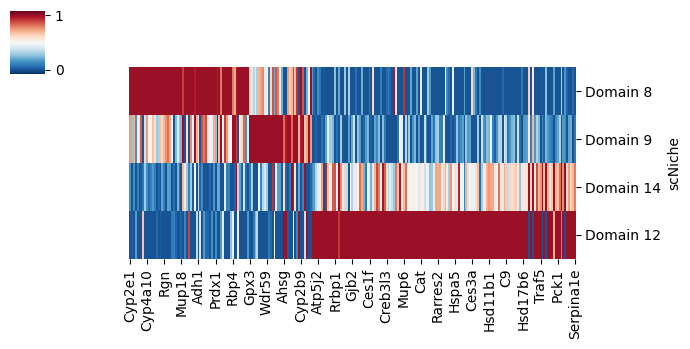

In [18]:
sns.clustermap(df.loc[select_niche, gene_list], cmap='RdBu_r',linewidths=0, linecolor='white', figsize=(7, 3.5), row_cluster=False, col_cluster=False, 
               vmax=1.08, vmin=-0.08, standard_scale=True)

### Multi-sample analysis framework

For large-scale datasets containing multiple samples under different conditions, `scniche` implements a multi-sample analysis framework that enables differential analyses at the sample scale,
such as the comparison of specific niches across different conditions, or the comparison of specific cell populations across different niches,
which holds the promise of identifying clinically relevant key niches or cell populations from large-scale datasets while avoiding the influence of individual outliers.

#### Calculate the cellular composition
We can calculate the cellular composition for each niche within each sample by the `calculate_composition_multi` function of `scNiche`,
and the result is stored in `adata.uns["composition_multi"]`.

By default, to avoid the effect of outliers, for each niche, only samples with a proportion of that niche exceeding 5% are considered.
We can set the value of `cutoff` parameter to change the threshold.

In [19]:
library_key = 'tile'
niche_key = 'scNiche'
celltype_key = 'celltype'
# select_niche =  ['Niche8', 'Niche9','Niche3', 'Niche14', 'Niche12'] 
# adata2 = adata[adata.obs['scNiche'].isin(select_niche)].copy()
sn.al.calculate_composition_multi(adata2, library_key=library_key, niche_key=niche_key, celltype_key=celltype_key, cutoff=0.05)
adata2.uns["composition_multi"].head()

,tile,scNiche,Niche_ratio,Hep_PC_ratio,Hep_MT_ratio,Hep_PP_ratio,Hep_Mup10_ratio,ENDO_ratio,Hep_Eef1a1_ratio,HSC-N_ratio,Hep_Gstp_ratio,Macrophage_Kupffer_ratio,Hep_Nuc_ratio,Hep_Injured_ratio,RBC_ratio,HPC_ratio,HSC-A_ratio,Macrophage_Inflamed_ratio
0,2102,Domain 9,0.369881,0.491667,0.278571,0.086905,0.027381,0.027381,0.023810,0.017857,0.014286,0.013095,0.009524,0.007143,0.002381,NaN,NaN,NaN
1,2102,Domain 12,0.269485,0.011438,0.140523,0.697712,0.022876,0.014706,0.024510,0.011438,0.039216,0.019608,0.003268,0.013072,0.001634,NaN,NaN,NaN
2,2102,Domain 8,0.234258,0.703008,0.156015,0.013158,0.045113,0.013158,0.020677,0.005639,0.009398,0.016917,0.009398,0.003759,0.003759,NaN,NaN,NaN
3,2102,Domain 14,0.126376,0.087108,0.439024,0.341463,0.006969,0.020906,0.041812,0.006969,0.031359,0.010453,0.006969,0.003484,0.003484,NaN,NaN,NaN
4,2103,Domain 12,0.371699,0.015416,0.139410,0.658847,0.050268,0.026810,0.019437,0.008713,0.027480,0.025469,0.004692,0.015416,0.008043,NaN,NaN,NaN


#### Calculate the phenotypic characteristics
We can calculate the phenotypic characteristics for each niche within each sample by the `calculate_average_exp_multi` function of `scNiche`,
and the result is stored in `adata.uns["expression_multi"]`.

By default, to avoid the effect of outliers, for each niche, only samples with a proportion of that niche exceeding 5% are considered.
We can set the value of `cutoff` parameter to change the threshold. Besides, we can set the value of `selected_celltype` parameter to
calculate the average phenotypic characteristics of all cells belonging to the selected cell populations, otherwise `selected_celltype=None`, `scniche`
will calculate the average phenotypic characteristics of all cells belonging to niches.

In this example, from Niche 8 to Niche 12, we observed a gradual decrease in the expression of the pericentral genes such as Cyp2e1.
Conversely, the expression of the periportal genes such as Cyp2f2 exhibited a gradual increase.

In [20]:
library_key = 'tile'
niche_key = 'scNiche'
celltype_key = 'celltype'

sn.al.calculate_average_exp_multi(adata2, layer_key='data', library_key=library_key, niche_key=niche_key, celltype_key=celltype_key, 
                                  gene_list=gene_list, selected_celltype=None, cutoff=0.05)
adata2.uns['expression_multi'].head()

,tile,scNiche,Niche_ratio,Cyp2e1,Mup17,Cyp2c29,Mup9,Cyp1a2,Cyp2a5,Apoe,...,Pck1,Pigr,Cmss1,Serpina1c,mt-Co1,Mup20,Cyp2f2,Alb,Mup3,Serpina1e
0,2102,Domain 9,0.369881,3.707258,1.915066,2.795876,1.468526,1.585924,0.686725,5.315590,...,1.732238,1.149595,1.936333,3.918890,5.402280,3.634639,1.955329,6.531855,4.670671,2.693110
1,2102,Domain 12,0.269485,1.800733,1.423011,1.606076,1.262633,0.799552,0.376547,5.226642,...,2.234807,1.821962,1.996384,4.150970,5.369847,4.707581,3.116444,6.938483,5.124405,3.558861
2,2102,Domain 8,0.234258,4.024568,3.009575,3.161391,2.169066,1.958670,1.256743,5.364186,...,1.673378,0.809099,2.108417,3.794487,5.387300,3.595226,1.681170,6.463605,4.644251,2.377600
3,2102,Domain 14,0.126376,2.352333,1.455933,1.923431,1.197426,0.863575,0.260446,5.237119,...,1.950503,1.550744,1.905077,4.025217,5.496201,4.218044,2.607663,6.720996,4.914938,3.312187
4,2103,Domain 12,0.371699,1.958145,1.490836,1.592242,1.289395,0.737066,0.269202,5.239373,...,2.390970,1.801097,1.982254,4.169171,5.383869,4.720624,3.108107,6.916126,5.120649,3.653472


In [21]:
'Cyp17a1' in gene_list

True

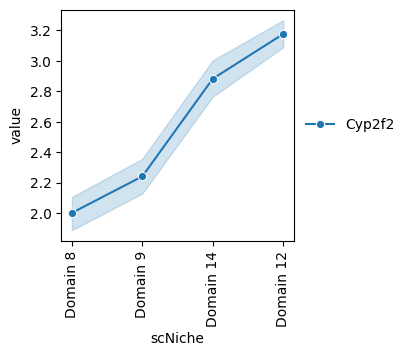

In [26]:
niche_list =  ['Domain 8', 'Domain 9', 'Domain 14', 'Domain 12']
plt.rcParams["figure.figsize"] = (3, 3)
sn.pl.multi_lineplot(adata=adata2, library_key='tile', show_list=['Cyp2f2'], mode='expression', order=niche_list,)
# plt.savefig(f"output/normal_{gene}_expression.pdf", bbox_inches="tight")
# plt.close()

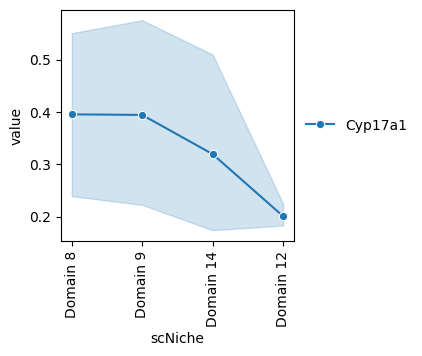

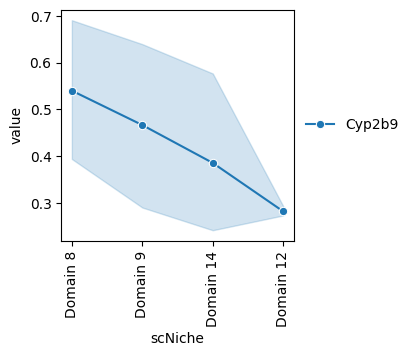

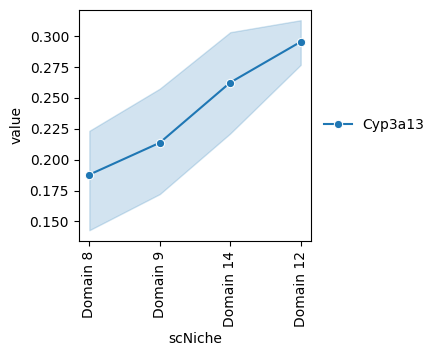

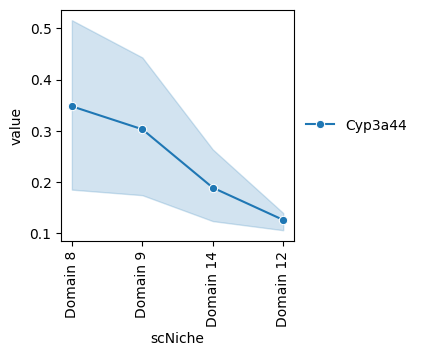

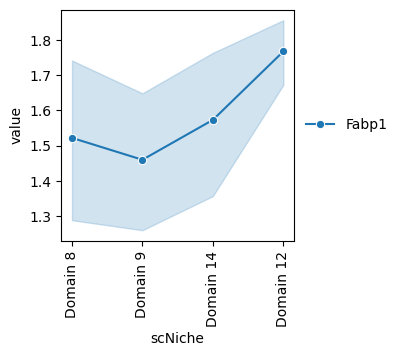

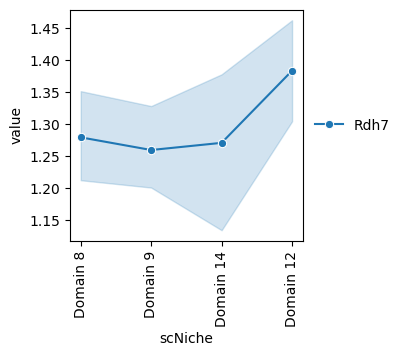

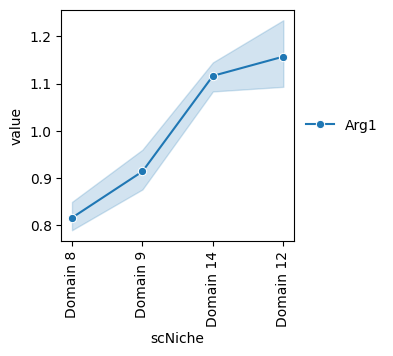

In [28]:
show_genes = ['Cyp17a1', 'Cyp2b9', 'Cyp3a13', 'Cyp3a44', 'Fabp1', 'Rdh7', 'Arg1'] #, 'Cyp2f2',
niche_list =  ['Domain 8', 'Domain 9', 'Domain 14', 'Domain 12']
for gene in show_genes:
    plt.rcParams["figure.figsize"] = (3, 3)
    sn.pl.multi_lineplot(adata=adata2, library_key='tile', show_list=[gene], mode='expression', order=niche_list,)
    plt.savefig(f"output/normal_{gene}_expression.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

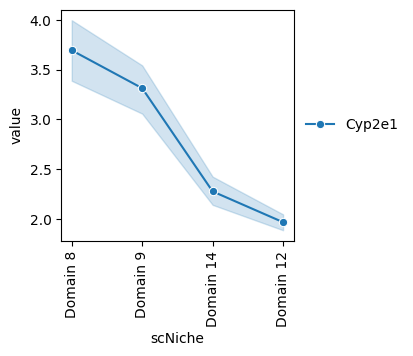

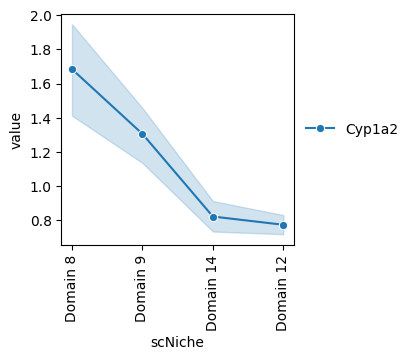

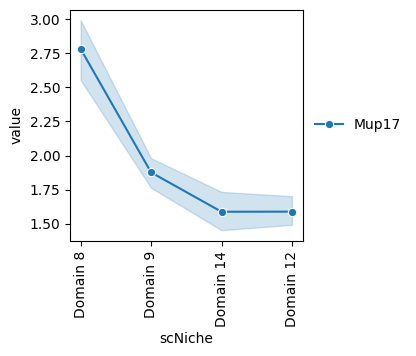

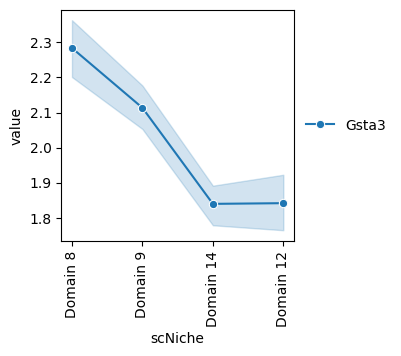

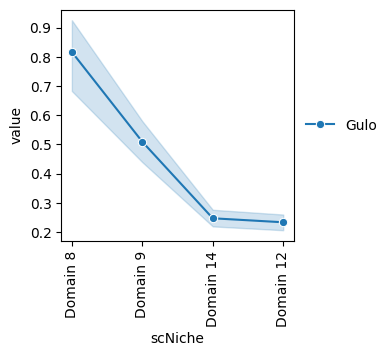

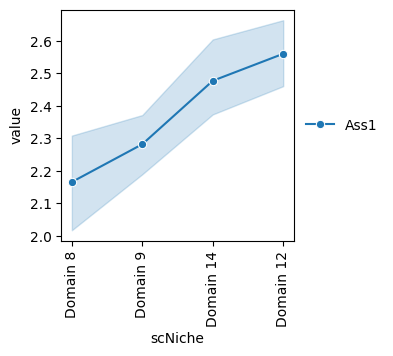

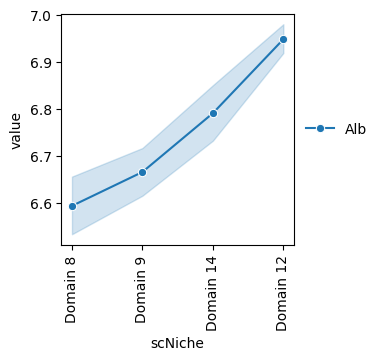

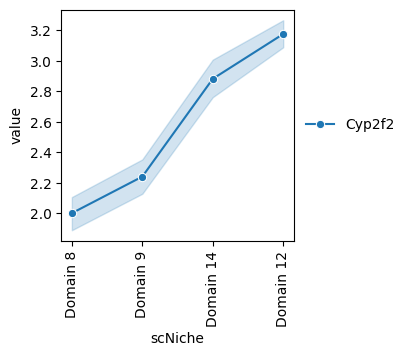

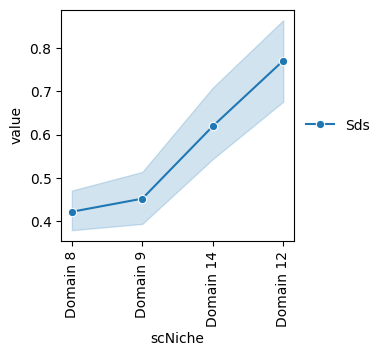

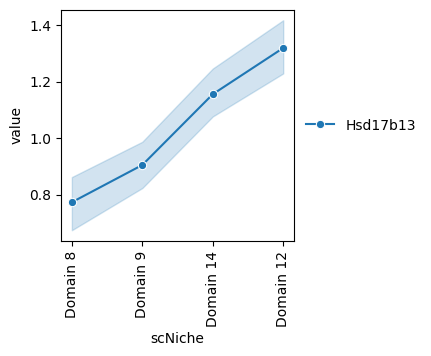

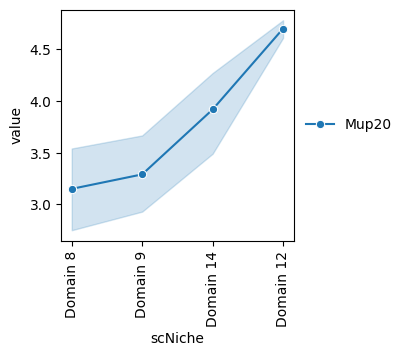

In [29]:
show_genes = ['Cyp2e1', 'Cyp1a2', 'Mup17', 'Gsta3', 'Gulo', 'Ass1', 'Alb', 'Cyp2f2', 'Sds', 'Hsd17b13', 'Mup20'] #, 'Cyp2f2',
niche_list =  ['Domain 8', 'Domain 9', 'Domain 14', 'Domain 12']
for gene in show_genes:
    plt.rcParams["figure.figsize"] = (3, 3)
    sn.pl.multi_lineplot(adata=adata2, library_key='tile', show_list=[gene], mode='expression', order=niche_list,)
    plt.savefig(f"output/gradients_{gene}_expression.pdf", bbox_inches="tight")
    plt.show()
    plt.close()

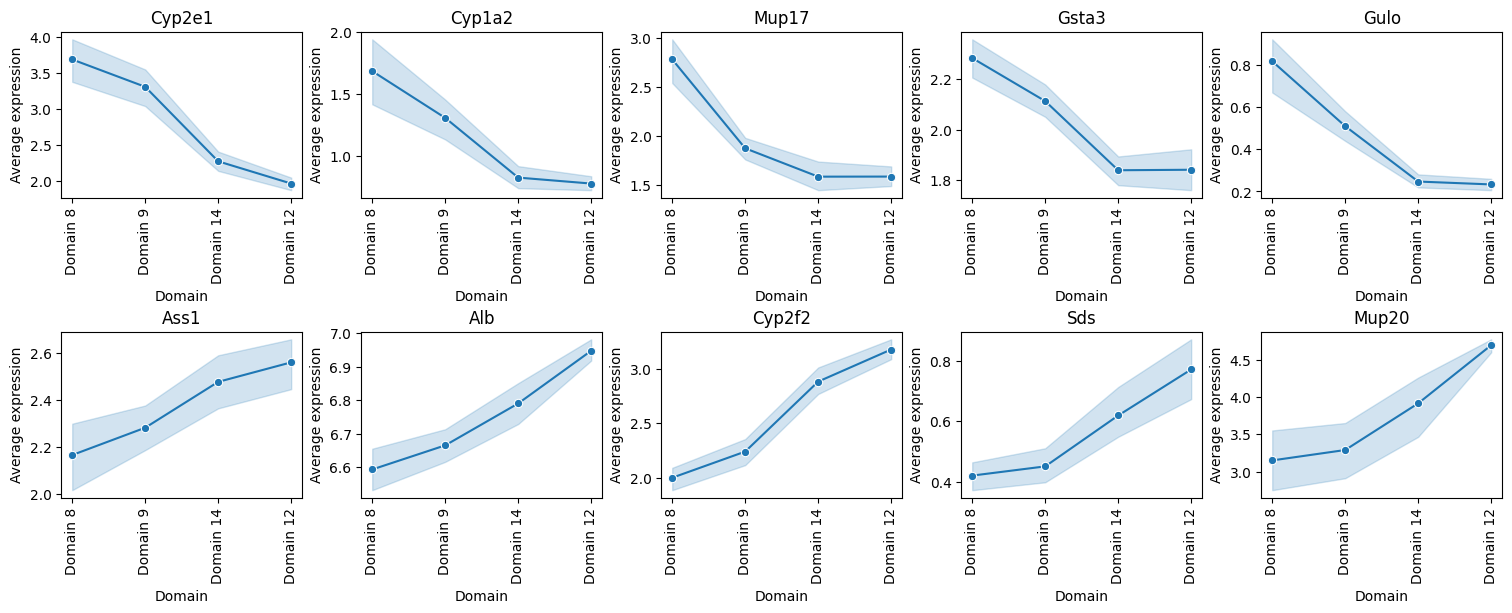

In [30]:
import matplotlib.pyplot as plt
import numpy as np

show_genes = ['Cyp2e1', 'Cyp1a2', 'Mup17', 'Gsta3', 'Gulo',
              'Ass1', 'Alb', 'Cyp2f2', 'Sds', 'Mup20']

niche_list = ['Domain 8', 'Domain 9', 'Domain 14', 'Domain 12']

# layout: 2 rows, ceil(len(show_genes)/2) columns
n_cols = int(np.ceil(len(show_genes) / 2))
fig, axes = plt.subplots(2, n_cols, figsize=(3*n_cols, 6), constrained_layout=True)

axes = axes.flatten()

for i, gene in enumerate(show_genes):
    plt.sca(axes[i])  # set current axis
    sn.pl.multi_lineplot(
        adata=adata2,
        library_key='tile',
        show_list=[gene],
        mode='expression',
        order=niche_list,
    )
    axes[i].set_title(gene)
    
    # set axis labels
    axes[i].set_xlabel("Domain")
    axes[i].set_ylabel("Average expression")

    # remove legend
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()

# hide unused axes if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.savefig("output/gradients_multiplot_expression.pdf", bbox_inches="tight")
plt.show()
plt.close()


Visually, we can observe the partial remodeling of the zonation patterns from the central vein to the portal node in TD livers compared to normal livers.
We can therefore perform further analysis by calculating the spatial connectivity between niches of different groups.

The `spatial_link` function of `scniche` is developed based on the `spatial_neighbors` function of `squidpy`.
We can first calculate the spatial connectivity between niches on each slice, then group the results and calculate the average spatial connectivity.

In [31]:
from tqdm import tqdm
df = pd.DataFrame()
for i in tqdm(list(set(adata.obs['tile']))):
    adata_tmp = adata[adata.obs['tile'] == i].copy()
    sn.al.spatial_link(adata_tmp, cluster_key='scNiche')
    
    # row: from; columns: to
    a = adata_tmp.uns['scNiche_spatial_link']
    np.fill_diagonal(a.values, np.nan)
    b = pd.melt(a, var_name='to', value_name='link_number')
    b['from'] = list(a.index) * a.shape[1]
    b['tile'] = i
    df = pd.concat([df, b], axis=0)
    
df['tile'] = df['tile'].astype('category')
df['to'] = df['to'].astype('str')

df.head()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.05s/it]


,to,link_number,from,tile
0,Domain 0,NaN,Domain 0,2116
1,Domain 0,0.0,Domain 1,2116
2,Domain 0,0.0,Domain 2,2116
3,Domain 0,0.0,Domain 3,2116
4,Domain 0,0.0,Domain 5,2116


We can further perform the differential expression analysis between Niche 12 and Niche 10, which were located at the portal node in normal and TD livers, respectively.

In [32]:
select_niche = ['Domain 12', 'Domain 10']
adata3 = adata[adata.obs['scNiche'].isin(select_niche)].copy()
sc.tl.rank_genes_groups(adata3, "scNiche", method="wilcoxon")

result = adata3.uns['rank_genes_groups']
groups = result['names'].dtype.names

df_results = pd.DataFrame()
for i in groups:
    df_tmp = pd.DataFrame({'gene': result['names'][i], 'pvals_adj': result['pvals_adj'][i], 'logfoldchanges': result['logfoldchanges'][i], 'niche': i})
    df_results = pd.concat([df_results, df_tmp])
    
df_results = df_results[df_results['pvals_adj'] < 0.05]
df_results = df_results[df_results['logfoldchanges'] > 0]

In [33]:
df_results.sort_values('logfoldchanges', ascending=False).groupby('niche').head(10)

,gene,pvals_adj,logfoldchanges,niche
42,Mup4,5.904069e-24,3.716315,Domain 12
93,Mup14,7.489430e-06,3.608021,Domain 12
1,Mup20,0.000000e+00,3.148860,Domain 12
36,Mup7,1.795366e-27,3.144118,Domain 12
0,Gpx3,0.000000e+00,3.075674,Domain 10
2,Serpina1e,0.000000e+00,3.020786,Domain 12
23,Traf5,4.789463e-60,2.946199,Domain 12
73,Mup21,1.323555e-09,2.615301,Domain 12
128,Mup5,6.935943e-03,2.574527,Domain 12
21,Cyp17a1,8.232313e-90,2.547587,Domain 10


In [34]:
df_sort = df_results.sort_values('logfoldchanges', ascending=False).groupby('niche').head(10)
df = sn.al.average_exp(adata3, layer_key='data', id_key='scNiche', val_key='scNiche', select_idx=None, select_val=select_niche)
gene_list_new = list(df_sort['gene'][:20])

In [35]:
gene_list_new = ['Mup4','Mup14','Mup7','Traf5','Mup21','Mup5','Mup6', 'Mup10', 'Ces3a','Mup12',
                 'Cyp17a1', 'Wfdc15b','Slpi','Wfdc12','Cyp2b9','Col5a2','Apoa4','Gsta1','Cyp2b10','Orm3']

In [36]:
# select_niche = ['Niche12', 'Niche10']
import matplotlib.pyplot as plt
dfsmall = df.loc[select_niche, gene_list_new]
fig = sns.clustermap(dfsmall, cmap='RdBu_r',linewidths=0, linecolor='white', figsize=(7, 2), row_cluster=False, col_cluster=False, 
               vmax=1.08, vmin=-0.08, standard_scale=True)
# sns.clustermap( dfsmall.T, cmap="RdBu_r", linewidths=0, linecolor="white", figsize=(3, 7), row_cluster=False, col_cluster=False, vmax=1.08, vmin=-0.08,
#                standard_scale=0  # now scale across niches (columns), same as above )
plt.savefig("output/heatmap.pdf", bbox_inches="tight")
plt.close()

`scniche` provides the `multi_linrplot_group` function to visualize the spatial variation trends of niches from different groups.
In this example, we found that these differential expression genes reflecting phenotypic changes during liver injury between Niche 12 and Niche 10 exhibited spatial expression gradients similar to those of pericentral or periportal markers.

In [37]:
select_niche = ['Domain 8', 'Domain 9', 'Domain 3', 'Domain 14', 'Domain 12', 'Domain 10']

library_key = 'tile'
niche_key = 'scNiche'
celltype_key = 'celltype'
gene_list = list(set(df_results['gene']))

adata4 = adata[adata.obs['scNiche'].isin(select_niche)].copy()
sn.al.calculate_average_exp_multi(adata4, layer_key='data', library_key=library_key, niche_key=niche_key, celltype_key=celltype_key, 
                                  gene_list=gene_list, selected_celltype=None, cutoff=0.05)

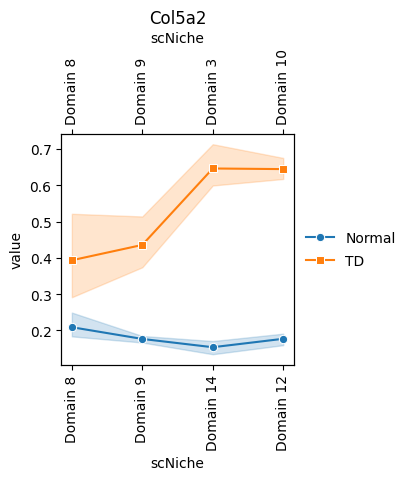

In [38]:
group_normal = [2102, 2103, 2104, 2105, 2106, 2107]
group_td = [2116, 2117, 2118, 2119]

group_normal_niche = ['Domain 8', 'Domain 9','Domain 14', 'Domain 12']
group_td_niche = ['Domain 8', 'Domain 9', 'Domain 3', 'Domain 10']

show_gene = 'Col5a2' #Gsta1
plt.rcParams["figure.figsize"] = (3, 3)
sn.pl.multi_linrplot_group(
    adata4, 
    library_key='tile', 
    show=show_gene, 
    group1=group_normal, 
    group2=group_td, 
    group1_niche=group_normal_niche, 
    group2_niche=group_td_niche,
    mode='expression',
    group_name_list=['Normal', 'TD'],
)

In [39]:
gene_list = ['Gsta1', 'Orm3', 'Col5a2', 'Mup4']  # your genes here

for gene in gene_list:
    plt.rcParams["figure.figsize"] = (3, 3)
    sn.pl.multi_linrplot_group(
    adata4, 
    library_key='tile', 
    show=gene, 
    group1=group_normal, 
    group2=group_td, 
    group1_niche=group_normal_niche, 
    group2_niche=group_td_niche,
    mode='expression',
    group_name_list=['Normal', 'TD'],)
    plt.savefig(f"output/{gene}_expression.pdf", bbox_inches="tight")
    plt.close()